Elijo año y creo la carpeta. Luna esto en Windowns no sé si anda. Usá os.path.join o borrá la linea que crea. 

In [1]:
year = 2009
path = f'../figs/positive_graphs/{year}'
import os
if not os.path.exists(path):
    os.makedirs(path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker
from new_disparity_filter import NewDisparityFilter

In [4]:
procesador = ProcesadorDeVotaciones(year, year, 'data')
congreso = procesador.procesar()
congreso.validate()

Loading from data/2009/1
Loading from data/2009/2
Loading from data/2009/3
Loading from data/2009/4
Loading from data/2009/5
Loading from data/2009/6
Loading from data/2009/7
Loading from data/2009/8
Loading from data/2009/9
Loading from data/2009/10
Loading from data/2009/11
Loading from data/2009/12


In [5]:
maker = HeavyGraphMaker(congreso)
grafo = maker.create_year_network(year, positive = True)

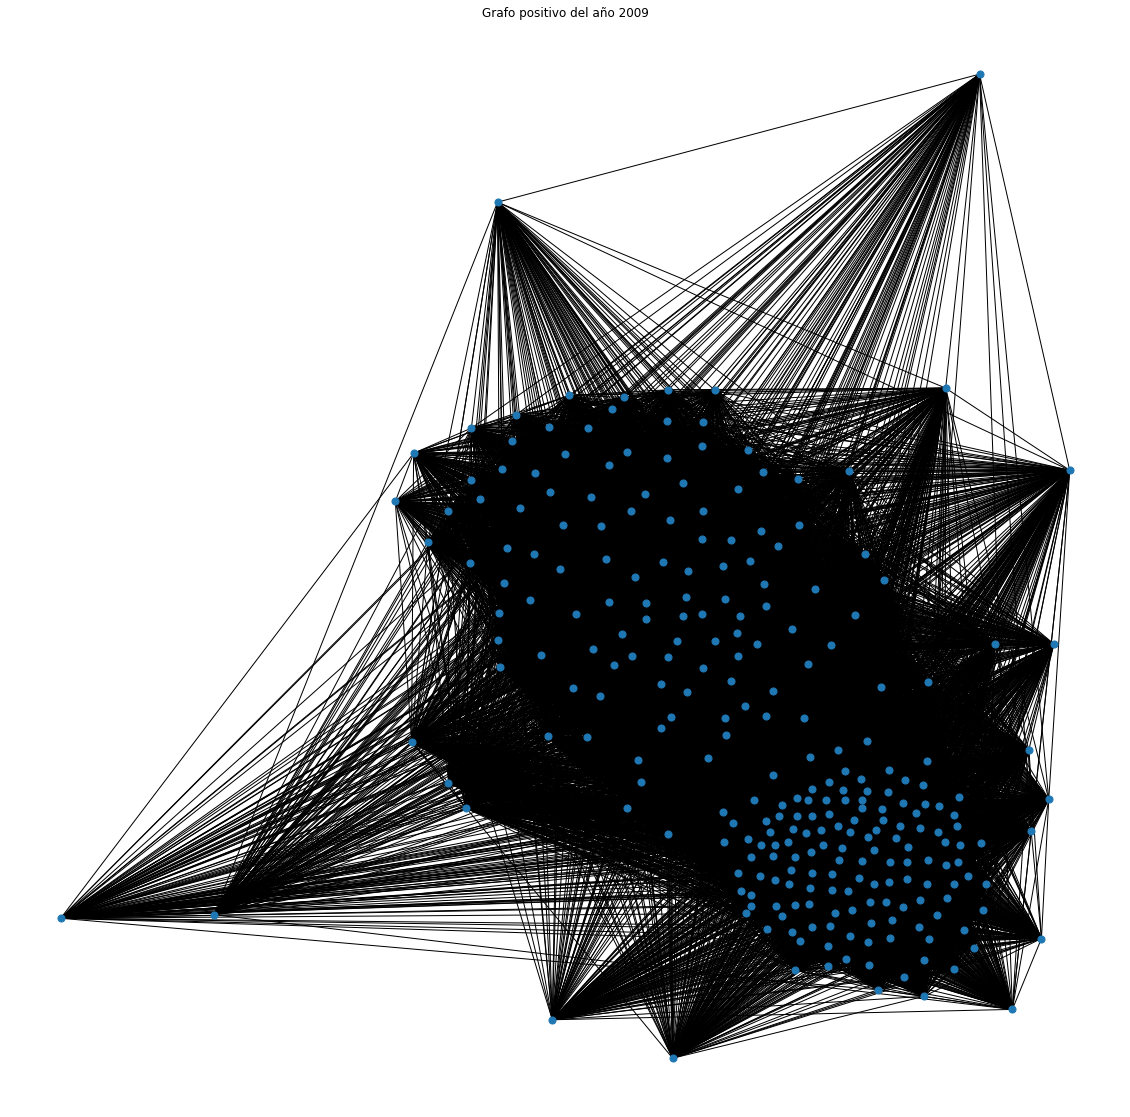

In [6]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo.get_nodes()
pos = nx.spring_layout(grafo.graph, k = 1)
ec = nx.draw_networkx_edges(grafo.graph, pos, alpha=1)
nc = nx.draw_networkx_nodes(grafo, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo positivo del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/{year}/grafo.jpg')
plt.show()

In [7]:
GC, _ = grafo.gigant_component()

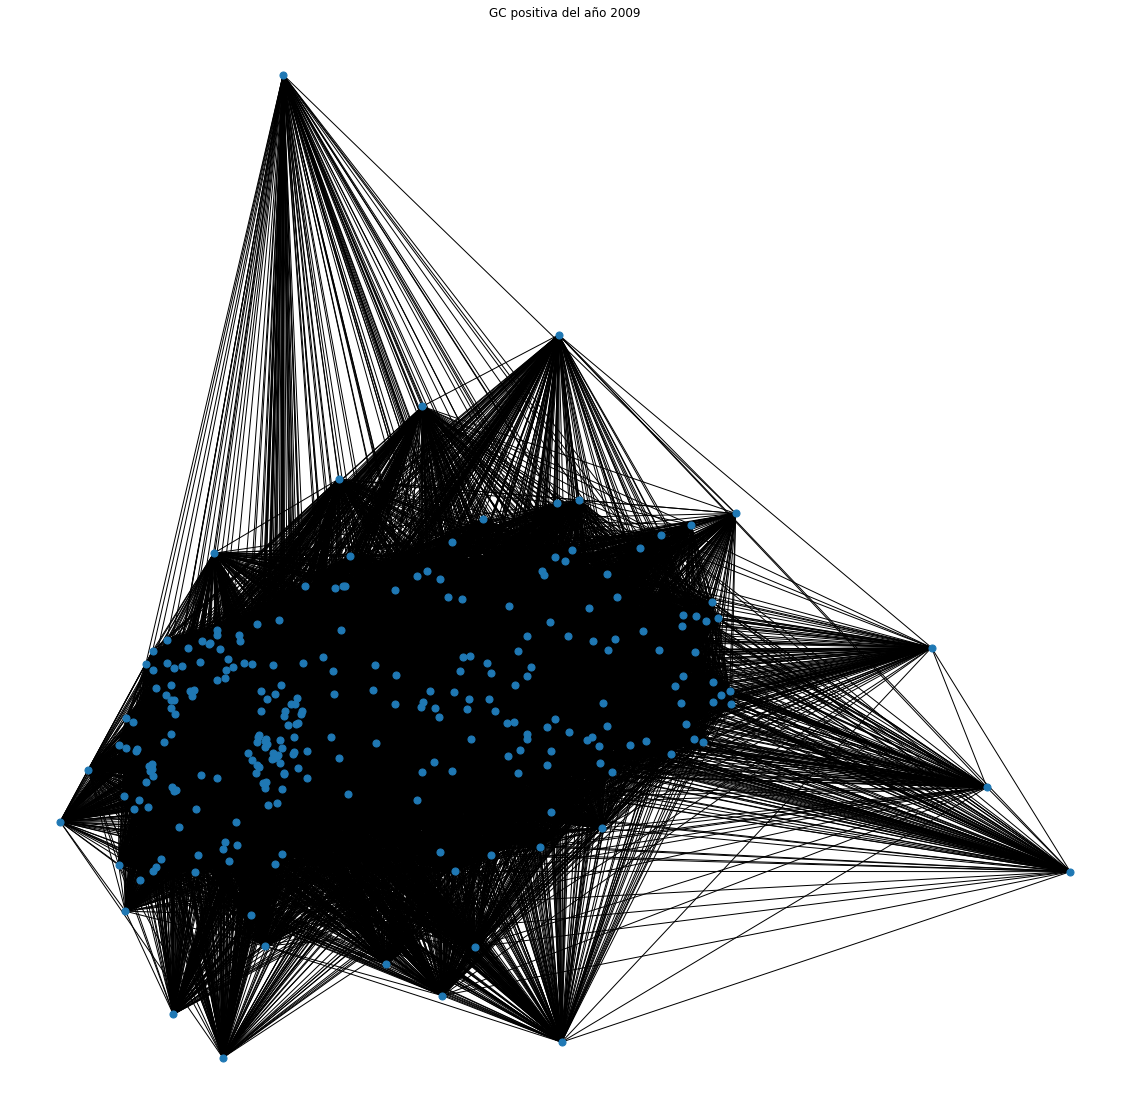

In [8]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC.nodes()
pos = nx.spring_layout(GC)
ec = nx.draw_networkx_edges(GC, pos, alpha=1)
nc = nx.draw_networkx_nodes(GC, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'GC positiva del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/{year}/GC.jpg')
plt.show()

In [9]:
print(f' El grafo tiene {len(grafo.get_edges())} enlaces')

 El grafo tiene 26699 enlaces


In [20]:
alpha = 0.04

In [21]:
copia = grafo.copy()
grafo_cortado = NewDisparityFilter(copia).alpha_cut(alpha_t = alpha)

The graph has 26699 edges
Max alpha is 0.16049475577516933, min alpha is 0.006290054516902114
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
Enlaces sacados: 19000
Enlaces sacados: 20000
Enlaces sacados: 21000
Enlaces sacados: 22000
Enlaces sacados: 23000
23011 edges deleted, 3688 left
Gigant component is 0.946969696969697 of the total


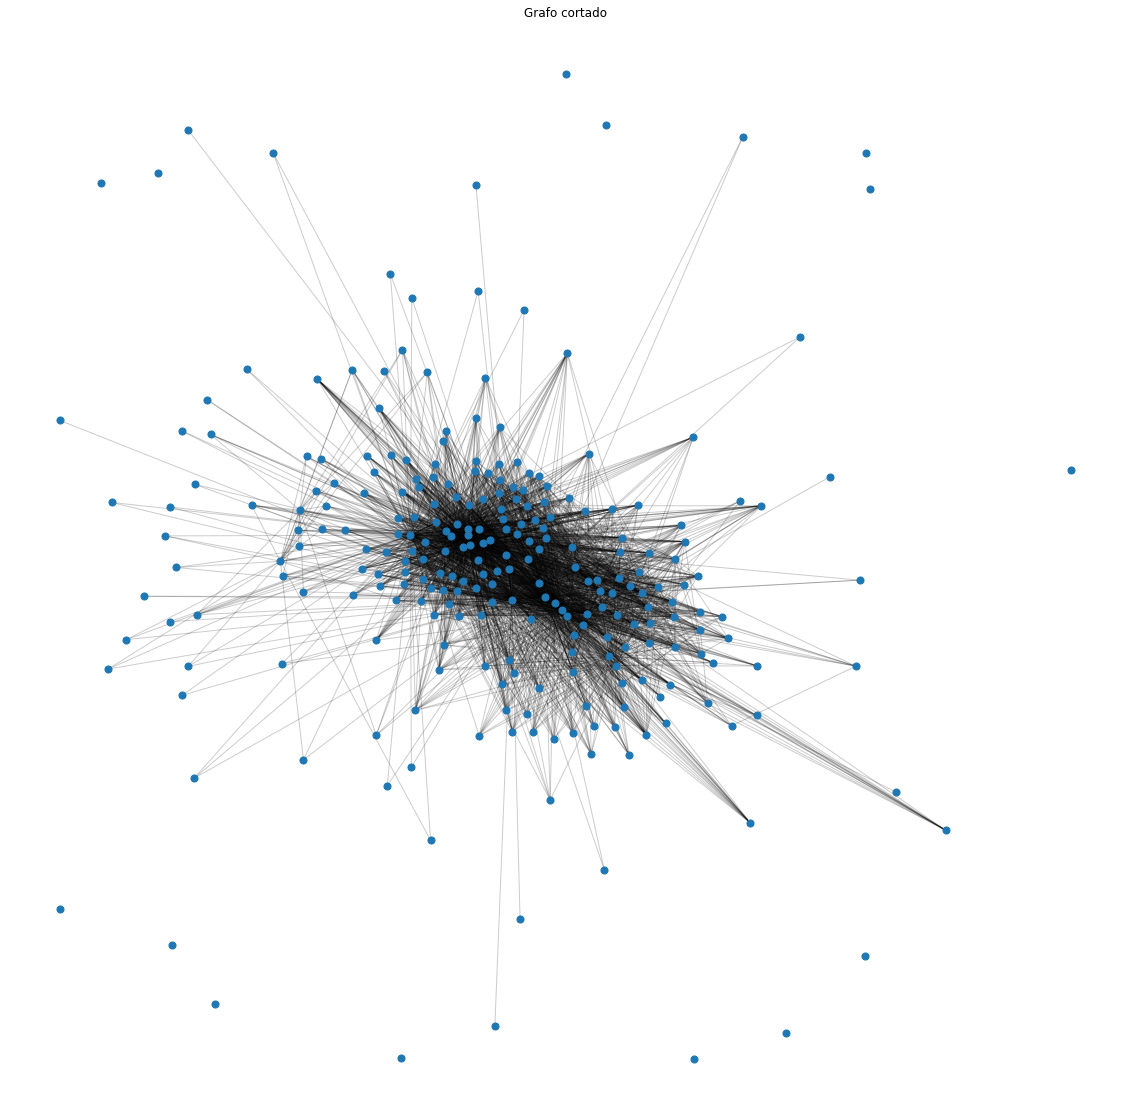

In [22]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado.get_nodes()
pos = nx.spring_layout(grafo_cortado.graph, k = 1)
ec = nx.draw_networkx_edges(grafo_cortado.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo cortado')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}/cortado_alpha_{alpha}.jpg')
plt.show()

In [23]:
GC_cut, _ = grafo_cortado.gigant_component()

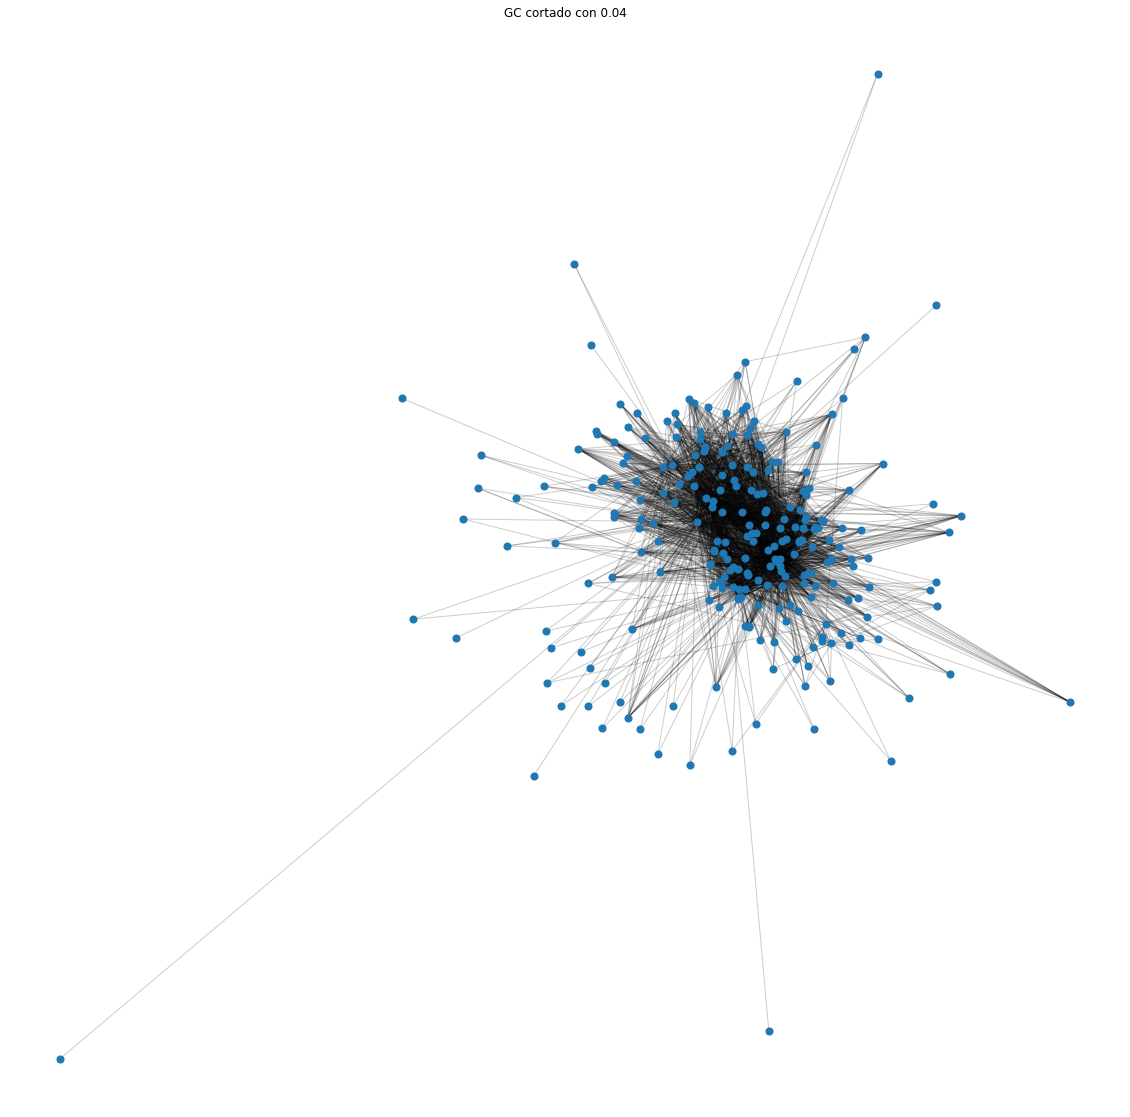

In [24]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC_cut.nodes()
pos = nx.spring_layout(GC_cut)
ec = nx.draw_networkx_edges(GC_cut, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(GC_cut, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'GC cortado con {alpha}')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}/GC_cortada_alpha_{alpha}.jpg')
plt.show()